## Credit Risk Modelling [EDA & Classification]

### Introduction

The analysis of credit risk and the decision making for granting loans is one of the most important operations for financial institutions. By taking into account past results, we need to train a model to accurately predict future outcomes. 

### Load data and Libraries


In [54]:
# define used libraries
libraries_used <- 
  c("lazyeval", "readr","plyr" ,"dplyr", "readxl", "ggplot2", 
    "funModeling", "scales", "tidyverse", "corrplot", "GGally", "caret",
    "rpart", "randomForest", "pROC", "gbm", "choroplethr", "choroplethrMaps",
    "microbenchmark", "doParallel", "e1071")

# check missing libraries
libraries_missing <- 
  libraries_used[!(libraries_used %in% installed.packages()[,"Package"])]
# install missing libraries
if(length(libraries_missing)) install.packages(libraries_missing)

In [77]:
options(warn = -1)

library(ggplot2)
library(corrplot)
library(GGally)
library(DT)
library(dplyr)
library(caret)
library(tidyr)

Load the data available for analysis. The dataset is takenas bank's records about the statuw of loan defaults and the profile of customers.

In [56]:
# Set the blank spaces to NA's
loan = read.csv("D:/Folders/R/Logistic Regression/loan.csv" , na = "")

In [57]:
colnames(loan)

[1] "id"                                        
  [2] "member_id"                                 
  [3] "loan_amnt"                                 
  [4] "funded_amnt"                               
  [5] "funded_amnt_inv"                           
  [6] "term"                                      
  [7] "int_rate"                                  
  [8] "installment"                               
  [9] "grade"                                     
 [10] "sub_grade"                                 
 [11] "emp_title"                                 
 [12] "emp_length"                                
 [13] "home_ownership"                            
 [14] "annual_inc"                                
 [15] "verification_status"                       
 [16] "issue_d"                                   
 [17] "loan_status"                               
 [18] "pymnt_plan"                                
 [19] "url"                                       
 [20] "desc"                                      
 [21] "purpose"                                   
 [22] "title"                                     
 [23] "zip_code"                                  
 [24] "addr_state"                                
 [25] "dti"                                       
 [26] "delinq_2yrs"                               
 [27] "earliest_cr_line"                          
 [28] "inq_last_6mths"                            
 [29] "mths_since_last_delinq"                    
 [30] "mths_since_last_record"                    
 [31] "open_acc"                                  
 [32] "pub_rec"                                   
 [33] "revol_bal"                                 
 [34] "revol_util"                                
 [35] "total_acc"                                 
 [36] "initial_list_status"                       
 [37] "out_prncp"                                 
 [38] "out_prncp_inv"                             
 [39] "total_pymnt"                               
 [40] "total_pymnt_inv"                           
 [41] "total_rec_prncp"                           
 [42] "total_rec_int"                             
 [43] "total_rec_late_fee"                        
 [44] "recoveries"                                
 [45] "collection_recovery_fee"                   
 [46] "last_pymnt_d"                              
 [47] "last_pymnt_amnt"                           
 [48] "next_pymnt_d"                              
 [49] "last_credit_pull_d"                        
 [50] "collections_12_mths_ex_med"                
 [51] "mths_since_last_major_derog"               
 [52] "policy_code"                               
 [53] "application_type"                          
 [54] "annual_inc_joint"                          
 [55] "dti_joint"                                 
 [56] "verification_status_joint"                 
 [57] "acc_now_delinq"                            
 [58] "tot_coll_amt"                              
 [59] "tot_cur_bal"                               
 [60] "open_acc_6m"                               
 [61] "open_act_il"                               
 [62] "open_il_12m"                               
 [63] "open_il_24m"                               
 [64] "mths_since_rcnt_il"                        
 [65] "total_bal_il"                              
 [66] "il_util"                                   
 [67] "open_rv_12m"                               
 [68] "open_rv_24m"                               
 [69] "max_bal_bc"                                
 [70] "all_util"                                  
 [71] "total_rev_hi_lim"                          
 [72] "inq_fi"                                    
 [73] "total_cu_tl"                               
 [74] "inq_last_12m"                              
 [75] "acc_open_past_24mths"                      
 [76] "avg_cur_bal"                               
 [77] "bc_open_to_buy"                            
 [78] "bc_util"                                   
 [79] "chargeoff_within_

### Feature Selection & Engineering

The dataset contains of information of age, annual income, grade of employee, home ownership that affect the probability of default of the borrower. The columns we are going to use are namely:

* **loan_status**    : Variable with multiple levels (e.g. Charged off, Current, Default, Fully Paid ...)
* **loan_amnt**      : Total amount of loan taken
* **int_rate**       : Loan interset rate
* **grade**          : Grade of employment
* **emp_length**     : Duration of employment
* **home_ownership** : Type of ownership of house
* **annual_inc**     : Total annual income
* **term**           : 36-month or 60-month period

In [58]:
# Select only the columns mentioned above.
loan <- loan[,c("loan_status","loan_amnt","int_rate","grade","emp_length","home_ownership","annual_inc","term")]
head(loan, n=10)

loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
Current,2500,13.56,C,10+ years,RENT,55000,36 months
Current,30000,18.94,D,10+ years,MORTGAGE,90000,60 months
Current,5000,17.97,D,6 years,MORTGAGE,59280,36 months
Current,4000,18.94,D,10+ years,MORTGAGE,92000,36 months
Current,30000,16.14,C,10+ years,MORTGAGE,57250,60 months
Current,5550,15.02,C,10+ years,MORTGAGE,152500,36 months
Current,2000,17.97,D,4 years,RENT,51000,36 months
Current,6000,13.56,C,10+ years,RENT,65000,36 months
Current,5000,17.97,D,10+ years,MORTGAGE,53580,36 months
Current,6000,14.47,C,< 1 year,OWN,300000,36 months


In [59]:
#Missing Value treatment
sapply(loan , function(x) sum(is.na(x)))

loan_status      loan_amnt       int_rate          grade     emp_length 
             0              0              0              0              0 
home_ownership     annual_inc           term 
             0              4              0

In [60]:
sapply(loan , function(x) sum(x=="NONE"))

loan_status      loan_amnt       int_rate          grade     emp_length 
             0              0              0              0              0 
home_ownership     annual_inc           term 
            54             NA              0

In [61]:
sapply(loan , function(x) sum(x=="ANY"))

loan_status      loan_amnt       int_rate          grade     emp_length 
             0              0              0              0              0 
home_ownership     annual_inc           term 
           996             NA              0

Remove the 4 rows with missing annual income, 1050 rows where home ownership is 'NONE' or 'ANY' and rows where emp_length is 'n/a'.


In [62]:
head(loan)
loan2 <- loan %>% filter(!is.na(annual_inc) , 
               !(home_ownership %in% c('NONE' , 'ANY')) , 
               emp_length != 'n/a')

loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
Current,2500,13.56,C,10+ years,RENT,55000,36 months
Current,30000,18.94,D,10+ years,MORTGAGE,90000,60 months
Current,5000,17.97,D,6 years,MORTGAGE,59280,36 months
Current,4000,18.94,D,10+ years,MORTGAGE,92000,36 months
Current,30000,16.14,C,10+ years,MORTGAGE,57250,60 months
Current,5550,15.02,C,10+ years,MORTGAGE,152500,36 months


### Exploratory Data Analysis


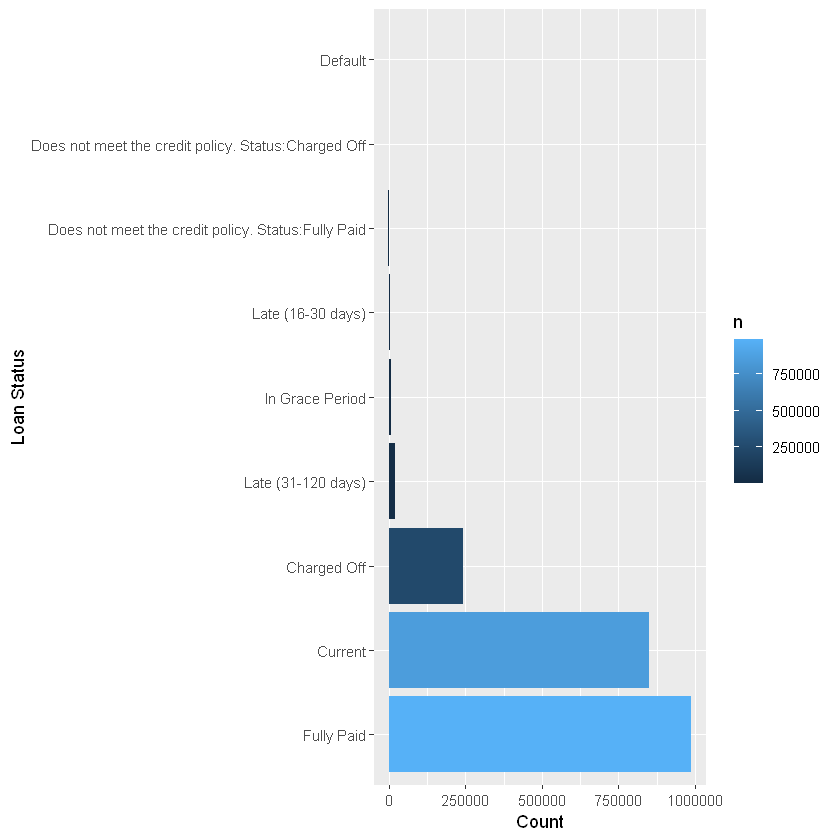

In [63]:
loan2 %>%
        count(loan_status) %>%
        ggplot(aes(x = reorder(loan_status , desc(n)) , y = n , fill = n)) + 
        geom_col() + 
        coord_flip() + 
        labs(x = 'Loan Status' , y = 'Count')

We want to convert this variable to binary (1 for default and 0 for non-default) but we have 9 different levels. Loans with status Current, Late payments, In grace period need to be removed. Therefore, we create a new variable called loan_outcome where

loan_outcome -> 1 if loan_status = 'Charged Off' or 'Default'

loan_outcome -> 0 if loan_status = 'Fully Paid'

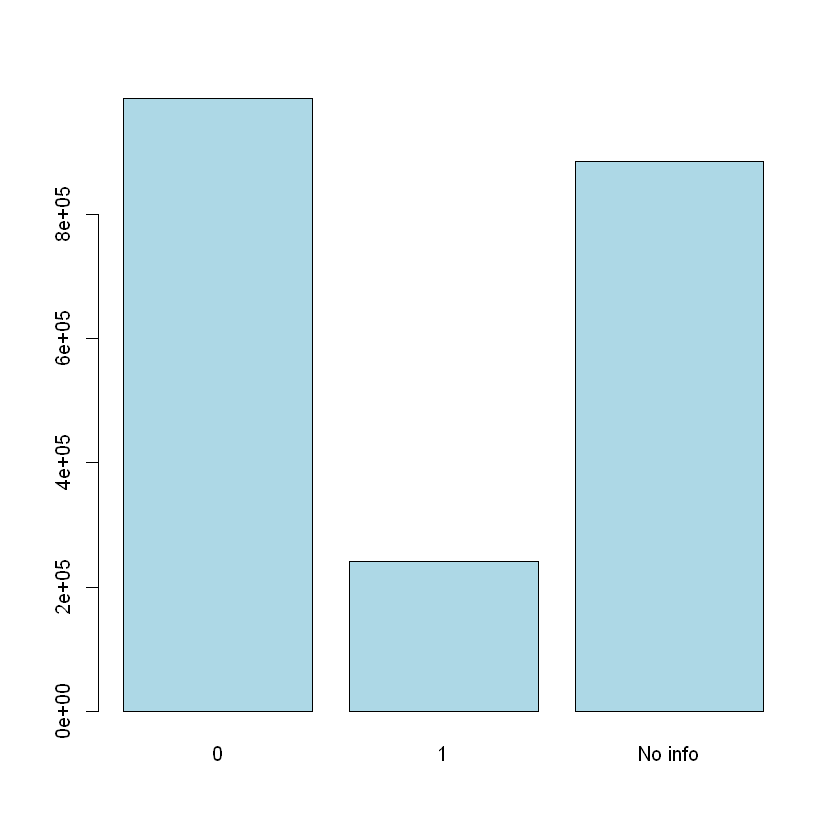

In [64]:
loan3 <- loan2 %>%
        mutate(loan_outcome = ifelse(loan_status %in% c('Charged Off' , 'Default') , 1, 
                                     ifelse(loan_status == 'Fully Paid' , 0 , 'No info')))

barplot(table(loan3$loan_outcome) , col = 'lightblue')

We will create a new dataset which contains only rows with 0 or 1 in loan_outcome feature for better modelling.

In [65]:
# Create the new dataset by filtering 0's and 1's in the loan_outcome column and remove loan_status column for the modelling
loan4 <- loan3 %>%
        select(-loan_status) %>%
        filter(loan_outcome %in% c(0 , 1))

Let's observe how useful these variables would be for credit risk modelling. It is known that the better the grade the lowest the interest rate. We can nicely visualise this with boxplots.

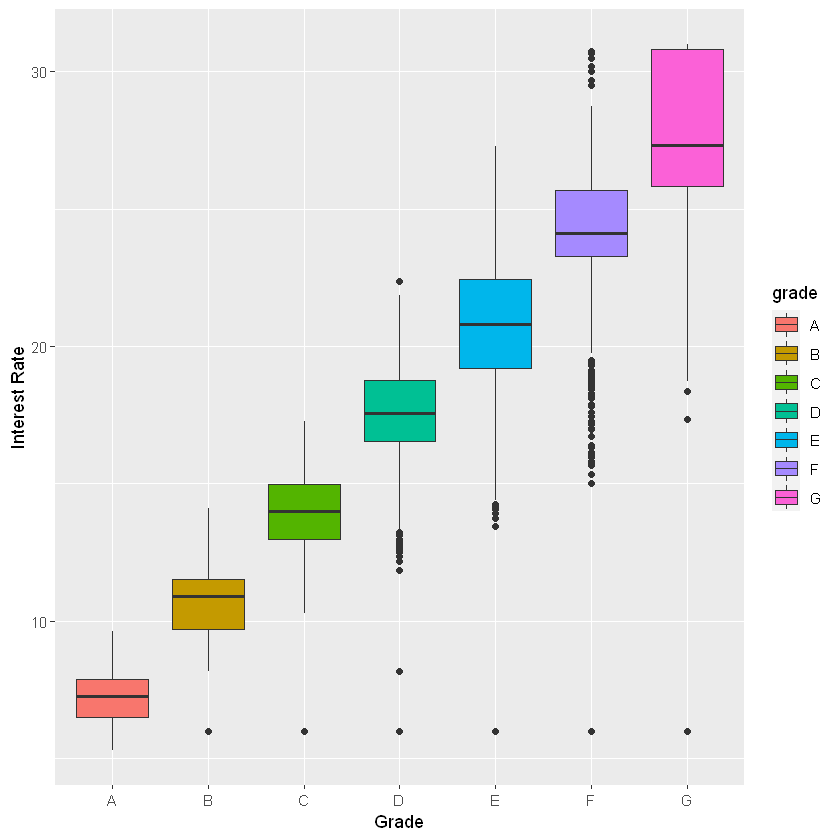

In [66]:
ggplot(loan4 , aes(x = grade , y = int_rate , fill = grade)) + 
        geom_boxplot() + 
        labs(y = 'Interest Rate' , x = 'Grade')


We assume that grade is a great predictor for the volume of non-performing loans. But how many of them did not performed grouped by grade?


   
    Fully Paid Default
  A     201708   12424
  B     311584   46655
  C     271318   76680
  D     128042   54771
  E      53267   33064
  F      16447   13413
  G       4285    4227

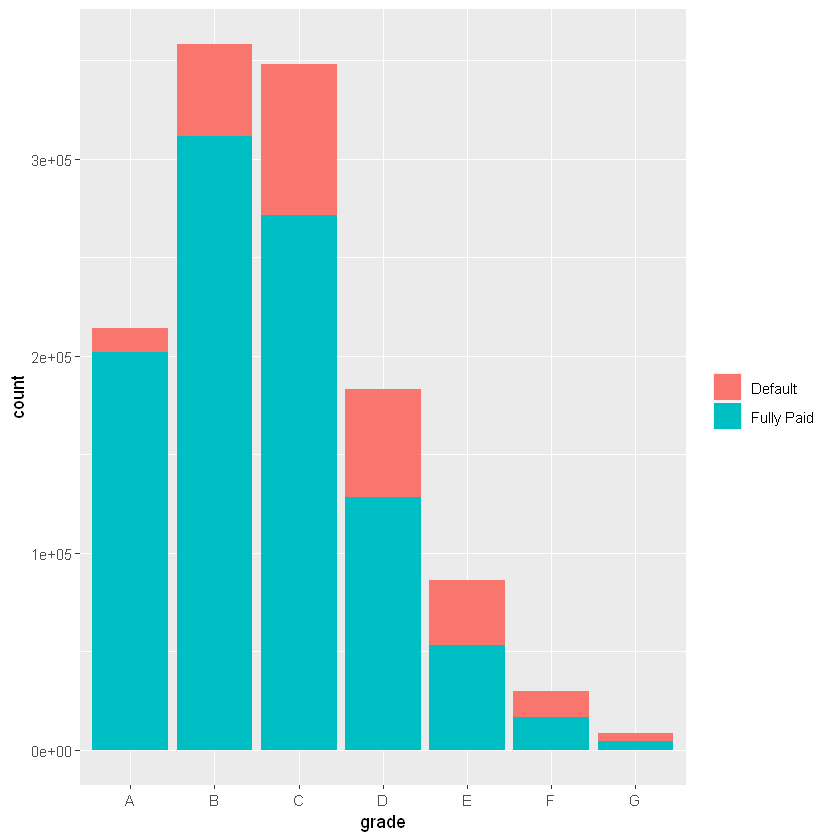

In [67]:
table(loan4$grade , factor(loan4$loan_outcome , c(0 , 1) , c('Fully Paid' , 'Default')))

ggplot(loan4 , aes(x = grade , y = ..count.. , fill = factor(loan_outcome , c(1 , 0) , c('Default' , 'Fully Paid')))) + 
        geom_bar() + 
        theme(legend.title = element_blank())

Now let's try to find out what impact the annual income of the borrower has on the other variables. 


`geom_smooth()` using formula 'y ~ x'


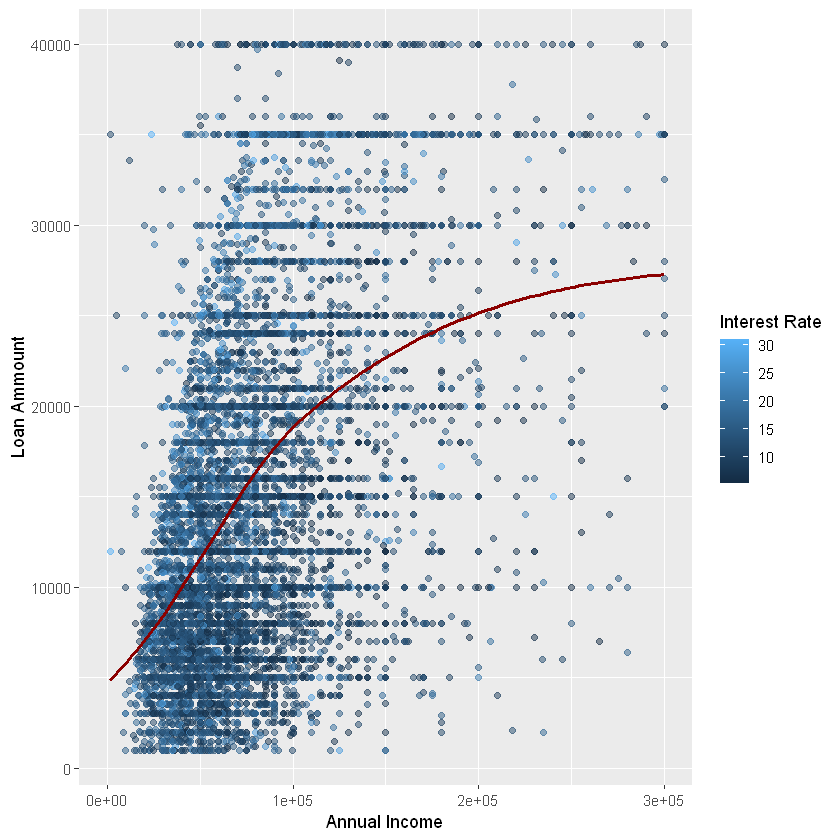

In [68]:
ggplot(loan4[sample(244179 , 10000) , ] , aes(x = annual_inc , y = loan_amnt , color = int_rate)) +
        geom_point(alpha = 0.5 , size = 1.5) + 
        geom_smooth(se = F , color = 'darkred' , method = 'loess') +
        xlim(c(0 , 300000)) + 
        labs(x = 'Annual Income' , y = 'Loan Ammount' , color = 'Interest Rate')


As expected the larger the annual income the larger the demanded ammount by the borrower.

### Data modelling

Modelling Process:

* We created the binary loan_outcome which will be our response variable.
* We exclude some independent variables in order to make the model simpler.
* We split the dataset to training set(75%) and testing set(25%) for the validation.
* We train a model to predict the probability of default.

Because of the binary response variable we can use logistic regression. Rather than modelling the response Y directly, logistic regression models the probability that Y belongs to a particular category, in our case the probability of a non-performing loan. This probability can be computed by the logistic function,

P = exp(b0 + b1X1 + ... + bNXN) / [ 1 + exp(b0 + b1X1 + ... + bNXN) ]

where

* P is the probability of default
* b0 , b1 , ... , bN are the coefficient estimates
* N the number of observations
* X1 , ... , XN are the independent variables


In [69]:
# Split dataset 
loan4$loan_outcome = as.numeric(loan4$loan_outcome)
idx = sample(dim(loan4)[1] , 0.75*dim(loan4)[1] , replace = F)
trainset = loan4[idx , ]
testset = loan4[-idx , ]

In [70]:
# Fit logistic regression
glm.model = glm(loan_outcome ~ . , trainset , family = binomial(link = 'logit'))
summary(glm.model)


Call:
glm(formula = loan_outcome ~ ., family = binomial(link = "logit"), 
    data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4534  -0.7106  -0.5319  -0.3215   7.0034  

Coefficients:
                      Estimate Std. Error  z value Pr(>|z|)    
(Intercept)         -3.144e+00  2.006e-02 -156.712  < 2e-16 ***
loan_amnt            1.146e-05  3.804e-07   30.126  < 2e-16 ***
int_rate             3.943e-02  1.763e-03   22.367  < 2e-16 ***
gradeB               6.544e-01  1.368e-02   47.837  < 2e-16 ***
gradeC               1.062e+00  1.692e-02   62.801  < 2e-16 ***
gradeD               1.271e+00  2.232e-02   56.928  < 2e-16 ***
gradeE               1.394e+00  2.815e-02   49.516  < 2e-16 ***
gradeF               1.447e+00  3.582e-02   40.404  < 2e-16 ***
gradeG               1.486e+00  4.544e-02   32.695  < 2e-16 ***
emp_length1 year    -5.265e-04  1.371e-02   -0.038 0.969366    
emp_length10+ years -5.943e-02  1.046e-02   -5.679 1.35e-08 ***
emp_len

The coefficients of the following features are **positive**:

1) Loan Amount

2) Interest Rate

3) Home Ownership - Other

4) Term

5) The better the grade the more difficult to default

This means the probability of defaulting on the given credit varies directly with these factors. For example more the given ammount of the loan, more the risk of losing credit.


The coefficients of the following features are **negative**:

1) Annual Income

2) Home Ownership - Own

3) Home Ownership - Rent

4) Borrowers with 10+ years of experience are more likely to pay their debt

5) There is no significant difference in the early years of employment

This means that the probability of defaulting is inversely proportional to the factors mentioned above.


In [71]:
# Prediction on test set
preds = predict(glm.model , testset , type = 'response')

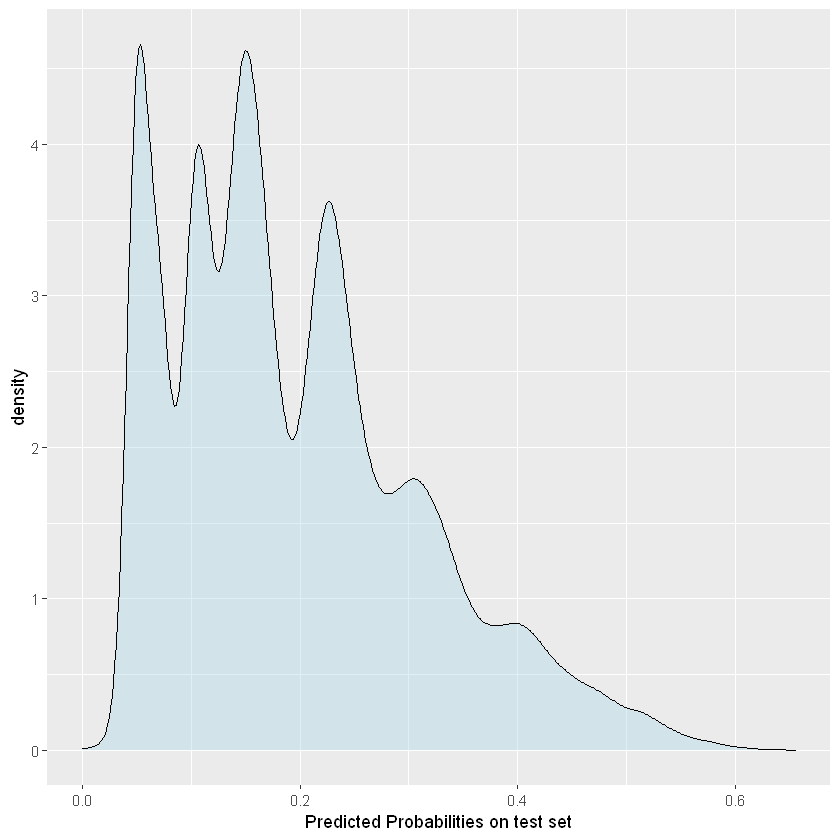

In [72]:
# Density of probabilities
ggplot(data.frame(preds) , aes(preds)) + 
        geom_density(fill = 'lightblue' , alpha = 0.4) +
        labs(x = 'Predicted Probabilities on test set')


But now let's see how the accuracy, sensitivity and specificity are transformed for given threshold. We can use a threshold of 50% for the posterior probability of default in order to assign an observation to the default class. However, if we are concerned about incorrectly predicting the default status for individuals who default, then we can consider lowering this threshold. So we will consider these three metrics for threshold levels from 1% up to 50%.

In [91]:
k = 0
accuracy = c()
sensitivity = c()
specificity = c()
for(i in seq(from = 0.01 , to = 0.5 , by = 0.01)){
        k = k + 1
        preds_binomial = ifelse(preds > i , 1 , 0)
        confmat = table(testset$loan_outcome , preds_binomial)
        accuracy[k] = sum(diag(confmat)) / sum(confmat)
        sensitivity[k] = confmat[1 , 1] / sum(confmat[ , 1])
        specificity[k] = confmat[2 , 2] / sum(confmat[ , 2])
}

In [74]:
rm(confmat , k , i , preds_binomial)

If we plot our results we get this visualization. 

In [75]:
threshold = seq(from = 0.01 , to = 0.5 , by = 0.01)

data = data.frame(threshold , accuracy , sensitivity , specificity)
head(data)

threshold,accuracy,sensitivity,specificity
0.01,0.1958941,0.8947368,0.1957643
0.02,0.1961254,0.9328358,0.1958036
0.03,0.1968583,0.9571046,0.1959335
0.04,0.2013930,0.9651100,0.1967297
0.05,0.2434880,0.9592604,0.2042458
0.06,0.2906747,0.9516149,0.2130538


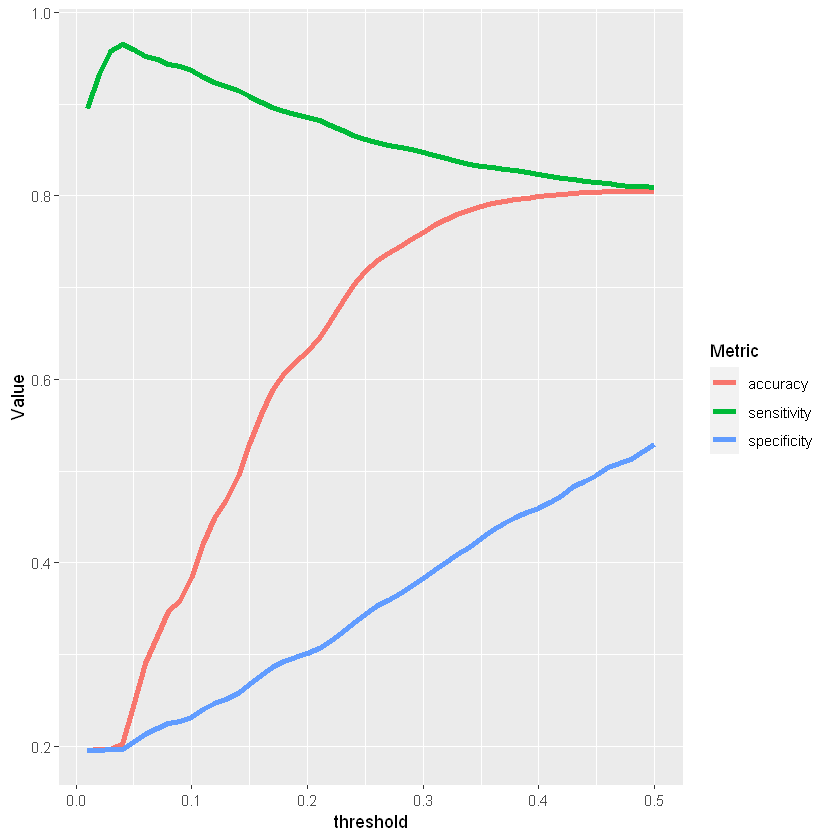

In [78]:
# Gather accuracy , sensitivity and specificity in one column
ggplot(gather(data , key = 'Metric' , value = 'Value' , 2:4) , 
       aes(x = threshold , y = Value , color = Metric)) + 
        geom_line(size = 1.5)

In [79]:
rm(data)

A threshold of 25% - 30% seems ideal cause further increase of the cut off percentage does not have significant impact on the accuracy of the model. The Confusion Matrix for cut off point at 30% will be this,


In [84]:
preds.for.30 = ifelse(preds > 0.3 , 1 , 0)
confusion_matrix_30 = table( Actual = testset$loan_outcome , Predicted = preds.for.30 )
confusion_matrix_30

      Predicted
Actual      0      1
     0 211404  35479
     1  38125  21964

In [85]:
paste('Accuracy :' , round(sum(diag(confusion_matrix_30)) / sum(confusion_matrix_30) , 4))

[1] "Accuracy : 0.7602"

In [86]:
rm(preds.for.30)

The *ROC (Receiver Operating Characteristics) curve* is a popular graphic for simultaneously displaying the two types of errors for all possible thresholds.


In [87]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [88]:
auc(roc(testset$loan_outcome , preds))

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7011

Setting levels: control = 0, case = 1
Setting direction: controls < cases


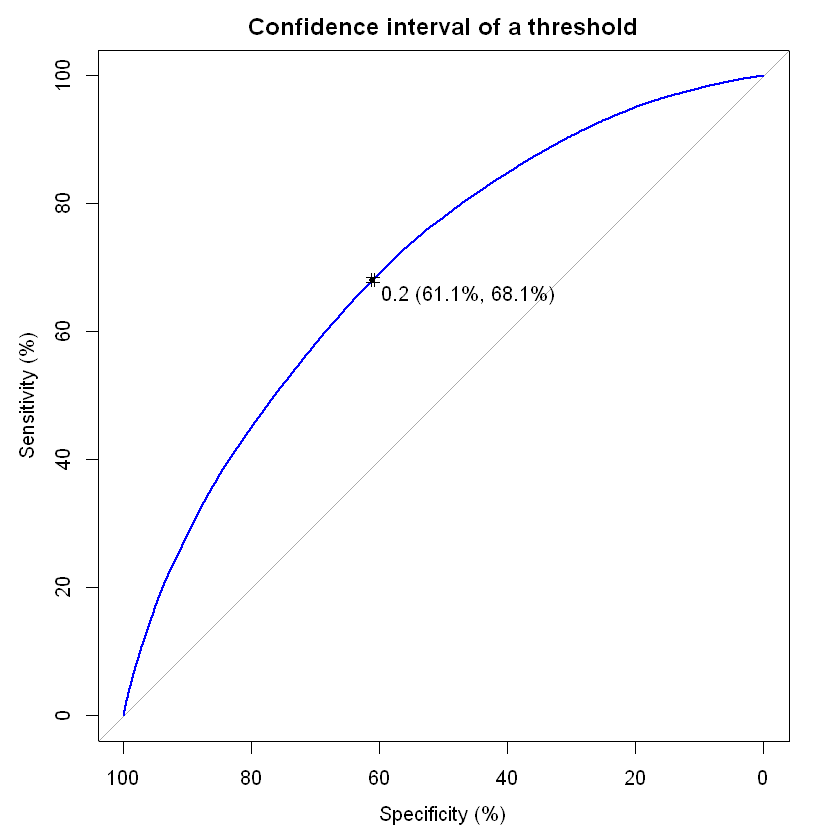

In [89]:
plot.roc(testset$loan_outcome , preds , main = "Confidence interval of a threshold" , percent = TRUE , 
         ci = TRUE , of = "thresholds" , thresholds = "best" , print.thres = "best" , col = 'blue')


### Conclusion

A logistic regression model was used to predict the loan status. Different cut off's were used to decide if the loan should be granted or not. Cut off of 30% gave a good accuracy of `r round(sum(diag(confusion_matrix_30)) / sum(confusion_matrix_30)*100 , 2)`%. The decision to set a cut off is arbitrary and higher levels of threshold increases the risk. The Area Under Curve also gives a measure of accuracy, which came out to be `r round(auc(roc(testset$loan_outcome , preds))*100 , 2)`%.

